c:\Users\virin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\virin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\virin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\virin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

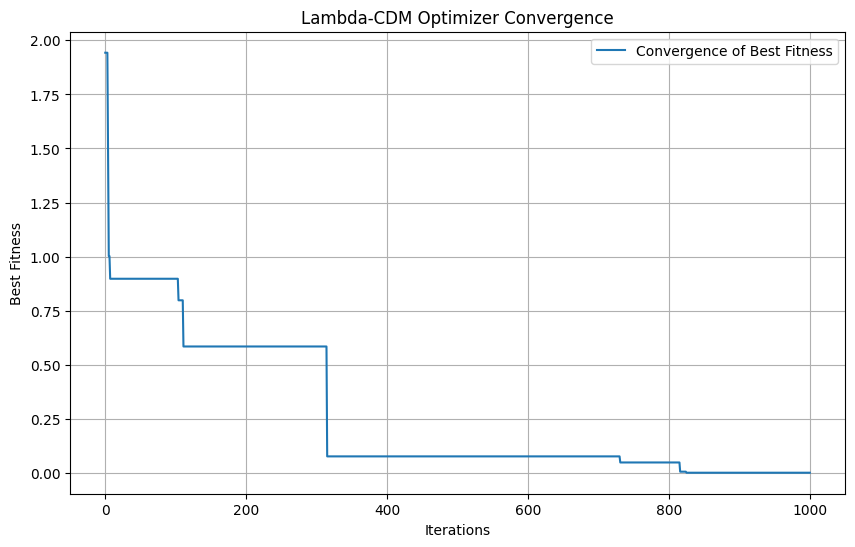

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Rastrigin Function
def rastrigin(x):
    A = 10
    return A * len(x) + sum([(xi**2 - A * np.cos(2 * np.pi * xi)) for xi in x])

# Gradient of Rastrigin Function
def rastrigin_gradient(x):
    grad = []
    for xi in x:
        grad.append(2 * xi + 20 * np.pi * np.sin(2 * np.pi * xi))
    return np.array(grad)

# Lambda-CDM Optimizer
def lambda_cdm_optimizer(
    func, 
    dim, 
    bounds, 
    population_size=100, 
    max_iter=1000,
    eta=0.01, 
    cluster_count=3
):
    # Initialization
    population = np.random.uniform(bounds[0], bounds[1], (population_size, dim))
    fitness = np.array([func(ind) for ind in population])
    best_solution = population[np.argmin(fitness)]
    best_fitness = np.min(fitness)
    alpha=np.random.uniform(0,1)
    gamma=np.random.uniform(0,1)

    # Convergence tracking
    convergence = [best_fitness]

    # Optimization loop
    for t in range(1, max_iter + 1):
        # Dark Energy Term
        lambda_t = 1 - t / max_iter  # Linear decay
        perturbations = lambda_t * np.random.normal(0, 1, (population_size, dim))
        population += perturbations

        # Attraction to Best Solution
        population += alpha * (best_solution - population)

        # Cold Dark Matter Term (Clustering)
        kmeans = KMeans(n_clusters=cluster_count, random_state=42)
        kmeans.fit(population)
        centroids = kmeans.cluster_centers_
        labels = kmeans.labels_

        for i, ind in enumerate(population):
            cluster_centroid = centroids[labels[i]]
            population[i] += gamma * (cluster_centroid - ind)

        # Ordinary Matter Term (Gradient Fine-tuning)
        for i in range(population_size):
            grad = rastrigin_gradient(population[i])
            population[i] -= eta * grad

        # Fitness Evaluation
        fitness = np.array([func(ind) for ind in population])
        current_best_idx = np.argmin(fitness)
        if fitness[current_best_idx] < best_fitness:
            best_fitness = fitness[current_best_idx]
            best_solution = population[current_best_idx]

        # Record convergence
        convergence.append(best_fitness)

    return best_solution, best_fitness, convergence

# Parameters
dim = 2
bounds = [-5.12, 5.12]
population_size = 100
max_iter = 1000

# Run the optimizer
best_solution, best_fitness, convergence = lambda_cdm_optimizer(
    rastrigin, dim, bounds, population_size, max_iter
)

# Plot convergence
plt.figure(figsize=(10, 6))
plt.plot(convergence, label="Convergence of Best Fitness")
plt.title("Lambda-CDM Optimizer Convergence")
plt.xlabel("Iterations")
plt.ylabel("Best Fitness")
plt.legend()
plt.grid()
plt.show()
